Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
shops=pd.merge(transactions,shops,on="shop_id")
shops=pd.merge(shops,items,on="item_id")
shops=pd.merge(shops,item_categories,on="item_category_id")
shops["date"]=shops["date"].apply(lambda x:pd.to_datetime(x,format="%d.%m.%Y"))
shops.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-02,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-03,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [6]:
print(shops.shape)
shops["revenue"]=shops["item_price"]*shops["item_cnt_day"]

(2935849, 11)


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [7]:
temp=shops[shops["date_block_num"]==20]
temp=pd.DataFrame(temp.groupby("shop_id")["revenue"].sum()).sort_values(by="revenue",ascending=False)
temp.head()

,revenue
shop_id,
31,7.982852e+06
25,6.783338e+06
12,6.378335e+06
28,4.985847e+06
27,4.899292e+06


In [8]:
# YOUR CODE GOES HERE
max_revenue = temp["revenue"].iloc[0]# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [9]:
temp=shops[shops["date_block_num"].isin([17,18,19])]
temp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,revenue
81,2014-06-26,17,25,8095,499.00,1.0,"Москва ТРК ""Атриум""",АВАТАР (BD+DVD),37,Кино - Blu-Ray,499.00
82,2014-06-30,17,25,8095,390.67,1.0,"Москва ТРК ""Атриум""",АВАТАР (BD+DVD),37,Кино - Blu-Ray,390.67
106,2014-07-08,18,24,8095,499.00,1.0,"Москва ТК ""Буденовский"" (пав.К7)",АВАТАР (BD+DVD),37,Кино - Blu-Ray,499.00
107,2014-08-23,19,24,8095,399.33,1.0,"Москва ТК ""Буденовский"" (пав.К7)",АВАТАР (BD+DVD),37,Кино - Blu-Ray,399.33
134,2014-08-09,19,18,8095,374.31,1.0,"Красноярск ТЦ ""Июнь""",АВАТАР (BD+DVD),37,Кино - Blu-Ray,374.31


In [10]:
temp=pd.DataFrame(temp.groupby("item_category_id")["revenue"].sum()).sort_values(by="revenue",ascending=False)
temp.head()

,revenue
item_category_id,
20,32157302.43
12,31385229.70
19,26237112.15
23,19896624.03
30,15876623.34


In [11]:
# YOUR CODE GOES HERE
category_id_with_max_revenue = temp.index[0]# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [12]:
temp=pd.DataFrame(shops.groupby("item_id")["item_price"].apply(pd.Series.nunique))
temp=temp[temp["item_price"]==1]

In [14]:
# YOUR CODE GOES HERE
num_items_constant_price = str(len(temp))# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [27]:
temp=shops[(shops["date_block_num"]==23) & (shops["shop_id"]==25) ]
temp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,revenue
86,2014-12-30,23,25,8095,352.27,1.0,"Москва ТРК ""Атриум""",АВАТАР (BD+DVD),37,Кино - Blu-Ray,352.27
87,2014-12-26,23,25,8095,383.97,1.0,"Москва ТРК ""Атриум""",АВАТАР (BD+DVD),37,Кино - Blu-Ray,383.97
88,2014-12-24,23,25,8095,332.67,1.0,"Москва ТРК ""Атриум""",АВАТАР (BD+DVD),37,Кино - Blu-Ray,332.67
1429,2014-12-30,23,25,16595,99.00,1.0,"Москва ТРК ""Атриум""",ОРДА (BD),37,Кино - Blu-Ray,99.00
1430,2014-12-20,23,25,16595,99.00,1.0,"Москва ТРК ""Атриум""",ОРДА (BD),37,Кино - Blu-Ray,99.00


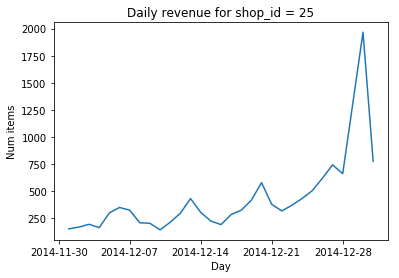

Current answer for task total_num_items_sold_var is: 117167.702299


In [28]:
shop_id = 25

total_num_items_sold = pd.DataFrame(temp.groupby("date")["item_cnt_day"].sum())["item_cnt_day"]# YOUR CODE GOES HERE
days = pd.DataFrame(temp.groupby("date")["item_cnt_day"].sum()).index# YOUR CODE GOES HERE
n=len(total_num_items_sold)
# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var =np.var(total_num_items_sold, ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [29]:
STUDENT_EMAIL = "B05801037@ntu.edu.tw" # EMAIL HERE
STUDENT_TOKEN = "3FDyanfVPF41BHYJ" # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [30]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)